## momQ CLV 점수를 활용한 고객세분화

#### 주제

__- 기업 입장에서의 고객가치를 정확하게 판단하고 이에 맞는 마케팅 전략을 기획__

#### CLV란

__일반적으로 LTV의 정의.__
#### *LTV란 한 명의 유저가 서비스에 진입하여 이탈(최종 활동)할 때까지 전체 기간에서 생산해낸 가치를 뜻함
출처: https://applift.com/blog/why-ltv-matters-2

### momQ EDA 

#### __브랜드의 특성.__
##### 1. 할인 이벤트
브랜드의 가장 많은 고민이 담긴 특성. 
가입, 기존 회원들에게 정률, 정액할인 쿠폰 증정을 많이 실행하는데 
쿠폰을 사용하고 브랜드를 이탈하는 경우가 발생함. -> 기업 이익 손해
##### 2. 영유아 제품 특성
영유아 제품을 주로 판매하는 브랜드의 특성으로 고객의 계속적인 구매행동을
기대할 수 있고 영유아 나이 등의 변수에 따라 객단가가 달라지기도 함. 
##### 3. 고객 인구통계학적 정보
대한민국 보통 영유아를 가진 부모의 나이는 20대 ~ 40대, 이외의 나이대를 가진 고객이 
구매한 제품을 통해 할인 혜택을 이용한 리셀러, 체리피커인지. 영유아 선물용으로
제품을 구매하기 위해 유입한 삼촌, 이모 고객 군인지 판단 필요. 

+) 맘카페 및 블로그 데이터 수집

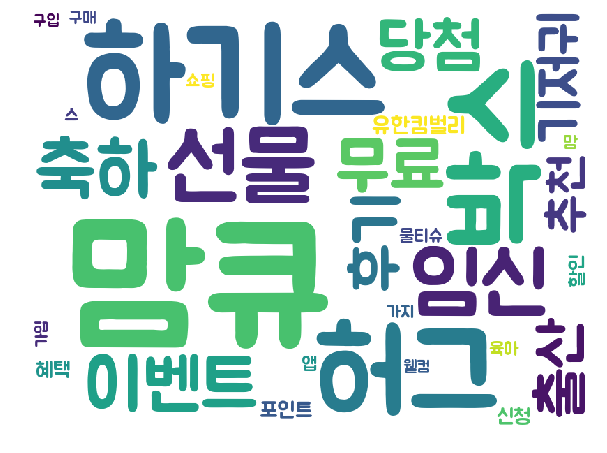

- 의외로 '할인' 이라는 주제의 제목보다 축하, 선물에 관련된 주제가 많이 나타남

### 이상치 제거 및 변수 전처리(가입일)

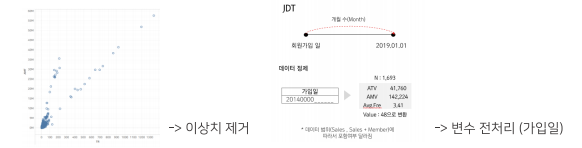

### EDA 작성 (tableau) 

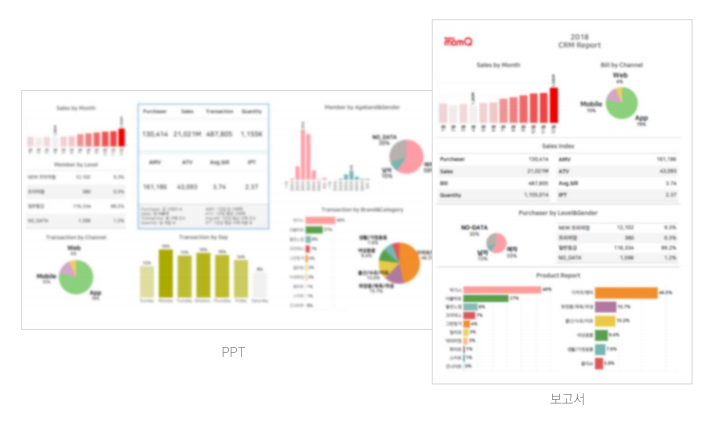

- 간단한 리포트 양식을 통해 요일별 매출 추이, 가입일, 구매한 제품군 등을 확인
- 아이 연령에 따라 주로 구매하는 제품이 다르다는 것을 확인하였음. 기저귀 사이즈, 공갈젖꼭지 등 
- ATV(객단가)가 4만원인 것을 확인하였음.

### 간단한 CLV 공식 산출

(공식)

EDA를 통해서 아이연령, 가입일(이벤트 시행일 유무)에 따라서 구매빈도와, 구매액 모두 달라지는 것을 확인. 

- 위 변수들을 활용하여 선형회귀분석(예상되는 매출), 로지스틱 회귀분석을 통해 이탈 예측 점수(0~1 사이의 소수점)를 산출하였음

- 각각 로지스틱회귀분석과 선형회귀분석을 활용하여 점수를 산출
이를 곱하여 CLV 점수를 계산. 


### 클러스터링

위에서 산출한 두가지 변수(고객당 예상 매출, 이탈 예측 점수)를 통해 K-means Clustering을 진행.

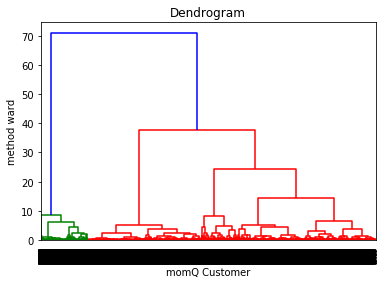

- 덴드로그램과 실루엣 계수를 참고하여 4개의 그룹으로 클러스터링을 진행
- 아래와 같은 결과 도출

### 결과

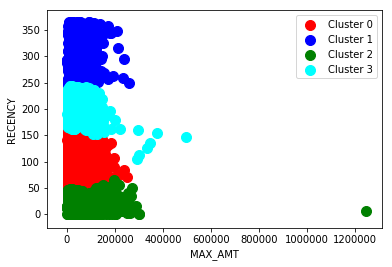

* 1 cluster : 브랜드 충성도 높음, 구매 빈도, 매출액 모두 상위 -> VIP 멤버십 가입유도 전략 
* 2 cluster : 가입일 짧음(신규 가입 多), 아이연령 낮음, 앞으로의 구매력 높음 -> 첫 아이 선물 패키징 구성(제품추천) 및 혜택 제공
* 3 cluster : 고객정보 아이없음, 구매빈도 낮음, 주로 공갈 젖꼭지, 아기용품 등 선물용 상품 구매 -> 직접 아이를 키우는 고객이 아닌 선물용 상품 구매 회원으로 추측 
* 4 cluster : 구매빈도 낮음, 가입일 = 이벤트일, 앞으로의 구매 확률이 낮을 것으로 예측 -> 리셀러나 체리피커로 추측 

### 한계점

* PCA 미활용: 당시 각 변수가 Score에 얼마나 영향을 주는지 측정하기 위해서 주성분분석을 활용하지 않았음. 주성분분석을 활용하였으면 더욱 정확한 score 예측을 수행할 수 있을 것이라는 판단. 
* 데이터 정합성: 누락된 데이터(ex. 아이연령, 유무 데이터)에 따라서 예측력이 낮아질 것이라는 판단. 